# ncRNA data analysis

## Targets searching

Datasets with interactions for lncRNA, miRNA and snRNA were downloaded, Homo Sapiens was selected as an organism, and interaction for the list of obtained ncRNA were selected

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import re
import itertools

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
lncRNA_data = pd.read_table('../data/lncRNA_interaction.txt', index_col=0)
miRNA_data = pd.read_table('../data/miRNA_interaction.txt', index_col=0)
snRNA_data = pd.read_table('../data/snRNA_interaction.txt', index_col=0)

interactions = pd.concat([lncRNA_data, miRNA_data, snRNA_data])
interactions = interactions.drop_duplicates()
interactions = interactions[interactions["Organism"] == "Homo sapiens"]
interactions.head()

,lncRNA_name,lnc_RNA_ID,Type,Interact_with,UniProt_ID,Interactant_type,Description,Experiment,Pubmed_ID,Organism,Tissue/Cell_line,Interaction,Interaction_class,Interaction_level,Source
Interaction_ID,,,,,,,,,,,,,,,
ncRI-40000004,7SK,NONHSAG040596,lncRNA,MYC,NM_002467,protein,Electrophoretic mobility shift experiment indi...,EMSA,9018369,Homo sapiens,-,regulatory;promoter as action site,regulatory,RNA-RNA,Literature mining
ncRI-40000005,7SK,NONHSAG040596,lncRNA,ABO,NM_020469,protein,Promoters pU6 and p7SK proved to express high ...,-,22522162,Homo sapiens,-,regulatory,regulatory,RNA-RNA,Literature mining
ncRI-40000006,7SK,NONHSAG040596,lncRNA,HEXIM1,O94992,protein,Binding of the 7SK snRNA turns the HEXIM1 prot...,Yeast two-hybrid analysis;Immunofluorescence;M...,15201869;15994294;17671421;20675720;20926576;1...,Homo sapiens,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining
ncRI-40000007,7SK,NONHSAG040596,lncRNA,Oct1,P20263,protein,PTF and Oct-1 enhance transcription from the 7...,-,1535687,Homo sapiens,-,ncRNA is regulated,regulatory,DNA-TF,Literature mining
ncRI-40000008,7SK,NONHSAG040596,lncRNA,Tat,P17735,protein,Tat efficiently replaces HEXIM1 on the 7SK snR...,-,20976203;20471949,Homo sapiens,-,ncRNA-protein binding,binding,RNA-Protein,Literature mining


In [ ]:
genes_list = pd.read_table('../data/genes.txt')
genes = list(itertools.chain.from_iterable(genes_list.values.tolist()))

In [4]:
targets = interactions.apply(lambda row: row['Interact_with'] if row['lncRNA_name'] in genes else np.nan, axis=1).drop_duplicates().dropna().tolist()
set(targets)

{'A1CF',
 'ACIN1',
 'ADAR',
 'AGGF1',
 'AGO1',
 'AGO2',
 'AGO3',
 'AGO4',
 'AIMP1',
 'AKAP8L',
 'AL121932',
 'ALKBH5',
 'ALYREF',
 'ANKHD1',
 'ANKRD17',
 'APBB2',
 'ARHGAP18',
 'ARID2',
 'ATG5',
 'ATXN3',
 'BAZ2B',
 'BCCIP',
 'BOLL',
 'BRCA1',
 'BRE',
 'BUD13',
 'Bcl-3',
 'C16orf74',
 'C17ORF85',
 'CBP',
 'CCIN',
 'CCND2',
 'CDK4',
 'CDKN1A',
 'CELF1',
 'CELF4',
 'CHMP3',
 'CLK3',
 'CNIH4',
 'CNOT7',
 'COX-2',
 'CPSF1',
 'CPSF3',
 'CPSF4',
 'CPSF5',
 'CPSF6',
 'CPSF7',
 'CRNKL1',
 'CSTF2',
 'CSTF2T',
 'CTD-2233C11.2',
 'CTD-2555O16',
 'Caprin1',
 'CoREST',
 'DBHS',
 'DCP1B',
 'DCTN6',
 'DDIT3',
 'DDX24',
 'DDX3X',
 'DDX42',
 'DDX43',
 'DDX5',
 'DDX54',
 'DDX55',
 'DDX59',
 'DDX6',
 'DGCR8',
 'DHX30',
 'DHX36',
 'DKC1',
 'DLX5',
 'DLX6',
 'DMBT1',
 'DNAJB5',
 'DNMT1',
 'DPYSL2',
 'DR1',
 'E2F1',
 'E2F4',
 'EBP1',
 'EED',
 'EIF2C1',
 'EIF3D',
 'EIF3H',
 'EIF4A3',
 'EIF4G2',
 'ELAV3',
 'ELAVL1',
 'ELAVL2',
 'EMX2',
 'EP300',
 'EPB41L5',
 'ERα/β',
 'ETS2',
 'EWSR1',
 'EXOS5',
 'EXOSC10',
 

In [5]:
types = interactions.apply(lambda row: row['Interaction'] if row['lncRNA_name'] in genes and row['Interact_with'] in targets else np.nan, axis=1).drop_duplicates().dropna().tolist()
types = list(itertools.chain.from_iterable(list(map(lambda x: x.split(";"), types))))
set(types)

{' ncRNA-protein binding',
 ' tag10',
 'CLIP',
 'RNA-RNA interaction',
 'RNA-protein binding',
 'expression correlation',
 'expression, or processing, or function of ncRNA is affected',
 'genetic interaction',
 'indirect',
 'miRNA',
 'miRNA target interaction',
 'ncRNA affects synthesis or function of protein',
 'ncRNA is regulated',
 'ncRNA targets mRNA',
 'ncRNA-protein binding',
 'promoter as action site',
 'regulatory'}

In [6]:
dirs = interactions.apply(lambda row: row['Interaction_level'] if row['lncRNA_name'] in genes and row['Interact_with'] in targets else np.nan, axis=1)
dirs.value_counts()

RNA-Protein    2657
RNA-RNA         445
RNA-DNA           4
RNA-TF            2
RNA-protein       1
Name: count, dtype: int64

In [7]:
cell_lines = interactions.apply(lambda row: row['Tissue/Cell_line'] if row['lncRNA_name'] in genes and row['Interact_with'] in targets else np.nan, axis=1).drop_duplicates().dropna().tolist()
cell_lines = list(itertools.chain.from_iterable(list(map(lambda x: re.split(r'\s*[;,]\s*', x), cell_lines))))
set(cell_lines)

{'',
 '-',
 '143B',
 '22Rv1',
 '293T',
 '293\xa0T',
 '293\u2009T，SKOV3',
 '786O',
 '8505 C',
 'A375',
 'A549',
 'A549 and H1299 cells',
 'A549 cells',
 'AC16',
 'ACHN',
 'AGS',
 'AIPC',
 'AMC-HN-8',
 'AML cells',
 'AR42J',
 'ARCaP',
 'Aortic Smooth Muscle',
 'BEAS2B',
 'BGC823',
 'BV2 cell',
 'BeWo',
 'Breast tissue',
 'C-28/I2 cells',
 'C28/I2',
 'C666',
 'CC cell line',
 'CCD-8Lu',
 'CCD4+ T-cell',
 'CD19-positive B lymphocytes',
 'CR4',
 'CaSki',
 'Caki-1',
 'Chondrocytes',
 'D283',
 'D3',
 'D341',
 'D425',
 'DDP',
 'DLD-1，NCM460',
 'DMEM',
 'DU145',
 'DU145 and PC3',
 'Daoy',
 'Diffuse Large B-Cell Lymphoma',
 'Dorsolateral prefrontal cortex',
 'ES',
 'Flp-In 293',
 'Flp-In T-REx 293',
 'Flp-In-293',
 'GBC-SD',
 'GEN1C',
 'GES-1',
 'Gestation Week 15',
 'Gestation Week 16.5',
 'Gestation Week 19',
 'Gestation Week 19.5',
 'Gestation Week 20.5',
 'H1',
 'H1299',
 'H1395',
 'H1650',
 'H1975',
 'H1993',
 'H1ES',
 'H358',
 'H9',
 'H9C2',
 'H9C2 cells',
 'H9ES',
 'H9c2',
 'HA5‐early',
 

## Targets GO Enrichment Analysis

We downloaded extra files for GO Enrichment analysis by goatools

In [8]:
from goatools.base import download_go_basic_obo
from goatools.base import download_ncbi_associations
from goatools.obo_parser import GODag

In [9]:
obo_fname = download_go_basic_obo()
fin_gene2go = download_ncbi_associations()
obodag = GODag("go-basic.obo")

  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2025-03-16) 43,544 Terms


In [10]:
# ! wget ftp://ftp.ebi.ac.uk/pub/databases/GO/goa/HUMAN/goa_human.gaf.gz
# ! gunzip goa_human.gaf.gz

We performed GO analysis with script downloaded from https://github.com/pmoris/goscripts.git in the command line: 

`python ./goscripts/go_enrichment_script.py -s ./data/targets_uniprot.txt -o go-basic.obo -g goa_human.gaf -n all`

Then we uploaded the results into the notebook

In [ ]:
goenr = pd.read_csv('../data/enrichment_results.csv', index_col=0)
goenr["cluster freq number"] = goenr["cluster freq"].str.split('/', expand=True)[0].astype(int)
goenr = goenr.sort_values("cluster freq number", ascending=False)

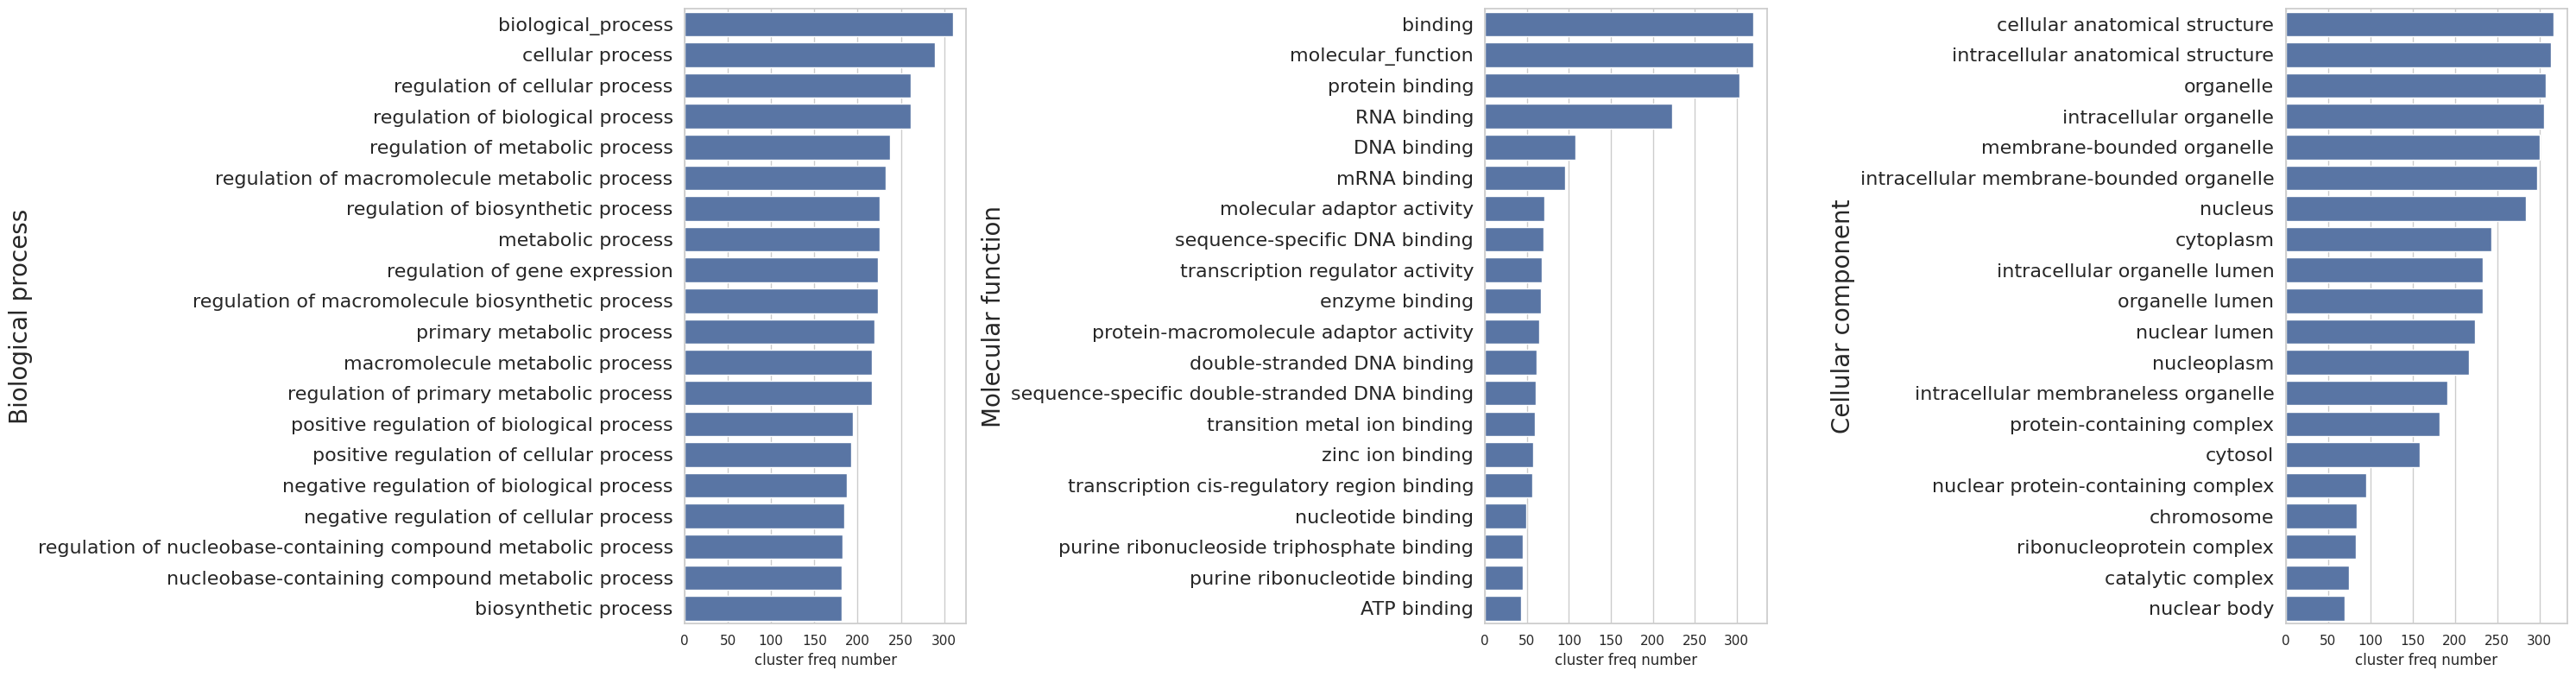

In [12]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(30, 8)
sns.barplot(x="cluster freq number", y="GO name", data=goenr[(goenr["GO namespace"] == "biological_process") & (goenr["corrected p-value"] < 0.05)].iloc[:20, :], ax=axes[0]).set_ylabel("Biological process",fontsize=20)
sns.barplot(x="cluster freq number", y="GO name", data=goenr[(goenr["GO namespace"] == "molecular_function") & (goenr["corrected p-value"] < 0.05)].iloc[:20, :], ax=axes[1]).set_ylabel("Molecular function",fontsize=20)
sns.barplot(x="cluster freq number", y="GO name", data=goenr[(goenr["GO namespace"] == "cellular_component") & (goenr["corrected p-value"] < 0.05)].iloc[:20, :], ax=axes[2]).set_ylabel("Cellular component",fontsize=20)
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
fig.tight_layout()
fig.show()

## Correlation analysis of Polycomb genes, ncRNA genes and targets genes expression

We used CS-CORE package (https://github.com/ChangSuBiostats/CS-CORE_python.git). Single-cell RNA sequencing data were downloaded, cell and genes in dataset were filtered and multiple correlation test was performed

In [ ]:
ncRNA_ids = pd.read_table('../data/ncrna_id_conversion.txt', index_col=0)
targets_ids = pd.read_table('../data/targets_id_conversion.txt', index_col=0)
polycomb_ids = pd.read_csv('../data/Polycomb_proteins.csv', index_col=0)

genes_of_interest = pd.concat([polycomb_ids["Ensembl_ID"], targets_ids["To"], ncRNA_ids["To"]]).to_list()

In [14]:
# ! wget https://datasets.cellxgene.cziscience.com/60591892-d938-4cdb-8545-3d84d5c16571.h5ad

In [ ]:
adata = sc.read_h5ad("../data/60591892-d938-4cdb-8545-3d84d5c16571.h5ad")
adata.shape

(107301, 59236)

In [16]:
adata.obsm["X_umap"] = adata.obsm["X_UMAP"].copy()

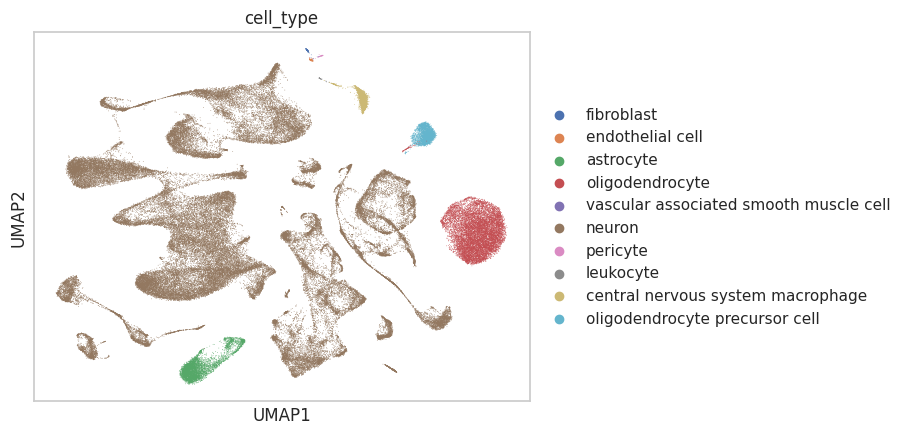

In [17]:
sc.pl.umap(adata, color="cell_type")

In [18]:
adata_filtered = adata[adata.obs['cell_type'].isin(['neuron'])]

In [19]:
adata_filtered = adata_filtered[:, adata_filtered.var_names.isin(genes_of_interest)]
adata_filtered.shape

(85093, 405)

In [20]:
sc.pp.filter_cells(adata_filtered, min_genes=10)
sc.pp.filter_genes(adata_filtered, min_cells=3)

In [21]:
adata_filtered.shape

(85092, 377)

In [22]:
adata_filtered.raw = adata_filtered.copy()
adata_filtered.obsm["X_umap"] = adata_filtered.obsm["X_UMAP"].copy()

In [23]:
sc.pp.normalize_total(adata_filtered, target_sum=1e4)
sc.pp.log1p(adata_filtered)

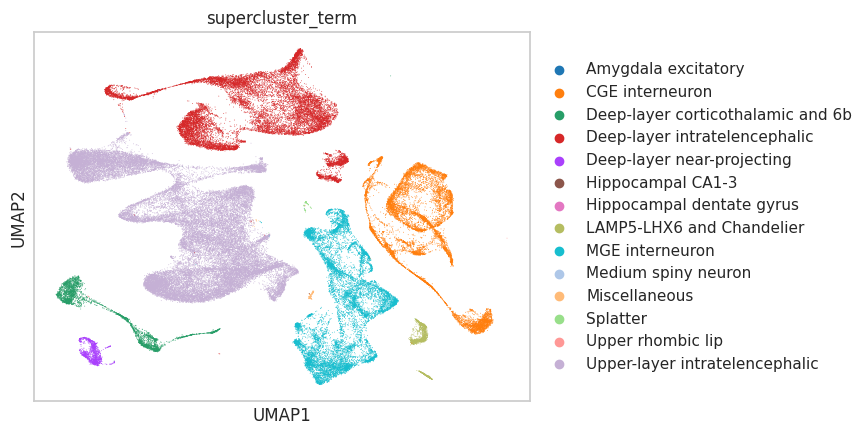

In [24]:
sc.pl.umap(adata_filtered, color="supercluster_term")

In [25]:
from CSCORE import CSCORE

In [26]:
top_genes_df = pd.DataFrame({'gene': adata_filtered.var.Gene})
top_genes_df = top_genes_df.reset_index()
top_genes_df["type"] = top_genes_df['index'].apply(lambda x: 'Polycomb' if x in list(polycomb_ids["Ensembl_ID"]) else ('RNA' if x in list(ncRNA_ids["To"]) else 'Target'))
top_genes_df.head()

,index,gene,type
0,ENSG00000203867,RBM20,Target
1,ENSG00000073792,IGF2BP2,Target
2,ENSG00000232046,LINC01798,RNA
3,ENSG00000229847,EMX2OS,RNA
4,ENSG00000231453,LINC01305,RNA


In [27]:
top_genes_df = top_genes_df.sort_values('type')
top_genes_df = top_genes_df.reset_index()
genes_indices = top_genes_df.index.astype(int).to_numpy()

In [28]:
top_genes_df["type"].value_counts()

type
Target      280
Polycomb     53
RNA          44
Name: count, dtype: int64

In [29]:
res = CSCORE(adata_filtered, genes_indices)

IRLS converged after 4 iterations.
17 among 377 genes have negative variance estimates. Their co-expressions with other genes were set to 0.
0.3940% co-expression estimates were greater than 1 and were set to 1.
0.1942% co-expression estimates were greater than 1 and were set to 1.


In [30]:
correlation_df = pd.DataFrame(res[0], index=top_genes_df["gene"], columns=top_genes_df["gene"])

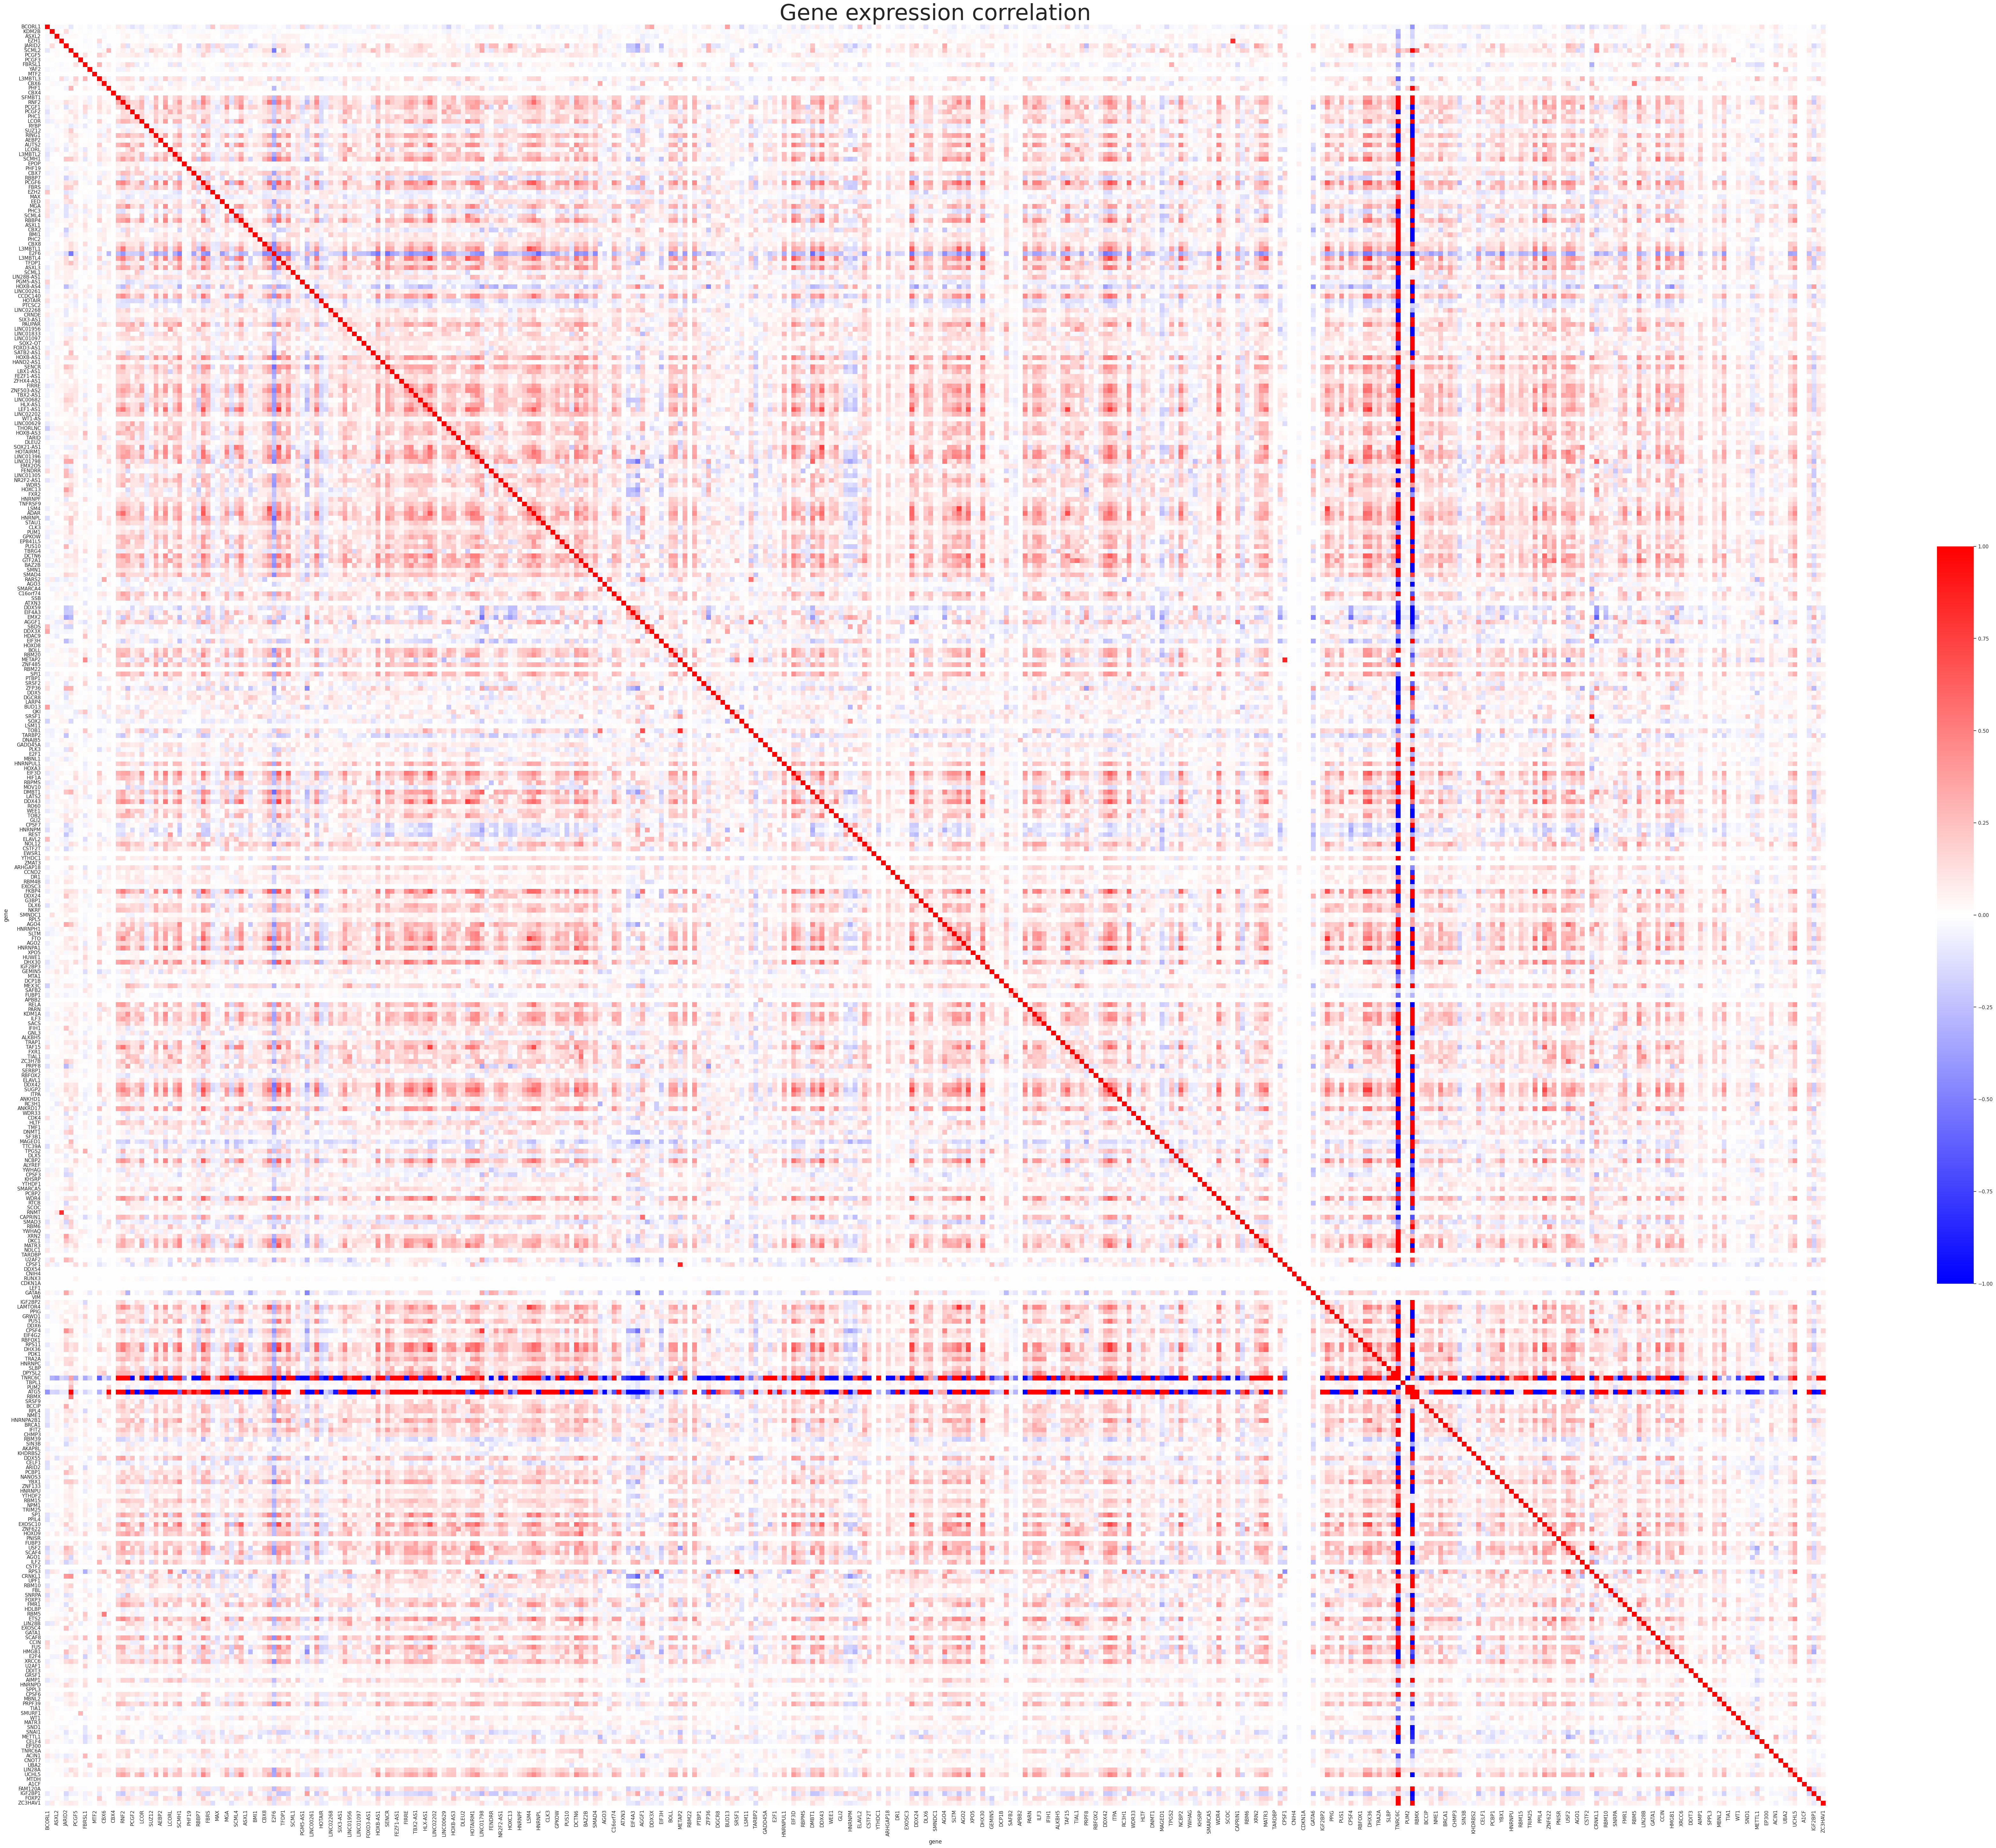

In [ ]:
plt.figure(figsize=(90, 100))
sns.heatmap(correlation_df, cmap='bwr', square=True, cbar_kws={"shrink": 0.3}, vmin=-1.0, vmax=1.0)
plt.title('Gene expression correlation', fontsize=50)
# plt.savefig('coexpression.pdf', format='pdf')
plt.show()